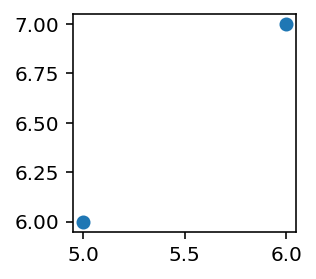

In [1]:
import matplotlib.pyplot as plt
x = [5, 6]
y = [6, 7]
plt.figure(figsize=(2,2))
plt.scatter(x,y)

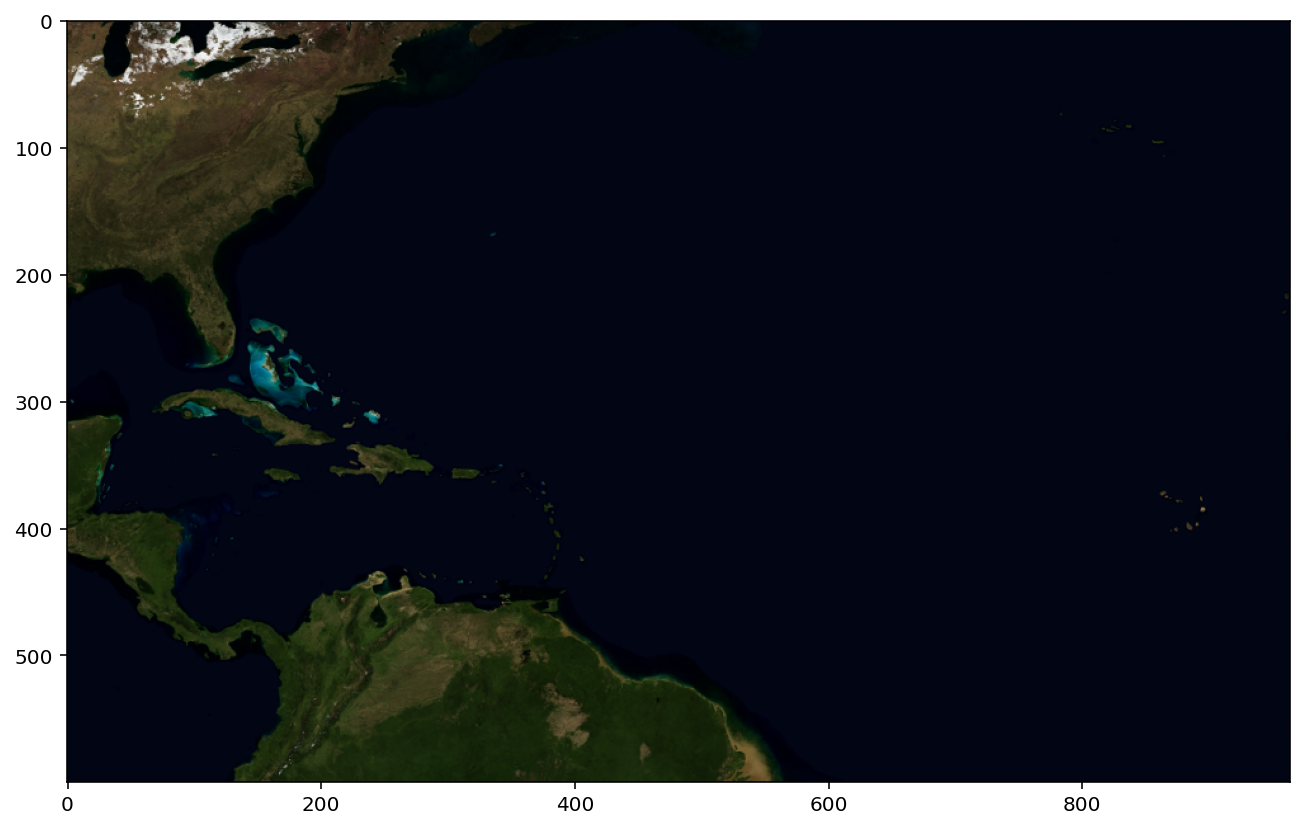

In [2]:
import matplotlib.image as mpi

img = mpi.imread('atlantic-basin.png')
plt.imshow(img)

Step 4


In [3]:
# latitude/longitude co-ordinates of edges of map
left = -90
right = -17.06
bottom = 0
top = 45

# dimensions of image in pixels
width = 964
height = 600

# lat/long of New York
lat_NY = 40.7
long_NY = -74.0

# Convert from lat/long to pixel coordinates
x_NY = (long_NY - left)*width/(right-left)
y_NY = (height*(1 - (lat_NY - bottom)/(top-bottom)))

# Print the pixel co-ordinates of New York
print("NY x pos:", x_NY)
print("NY y pos:", y_NY)

NY x pos: 211.46147518508363
NY y pos: 57.3333333333333


Text(211.46147518508363, 57.3333333333333, 'New York')

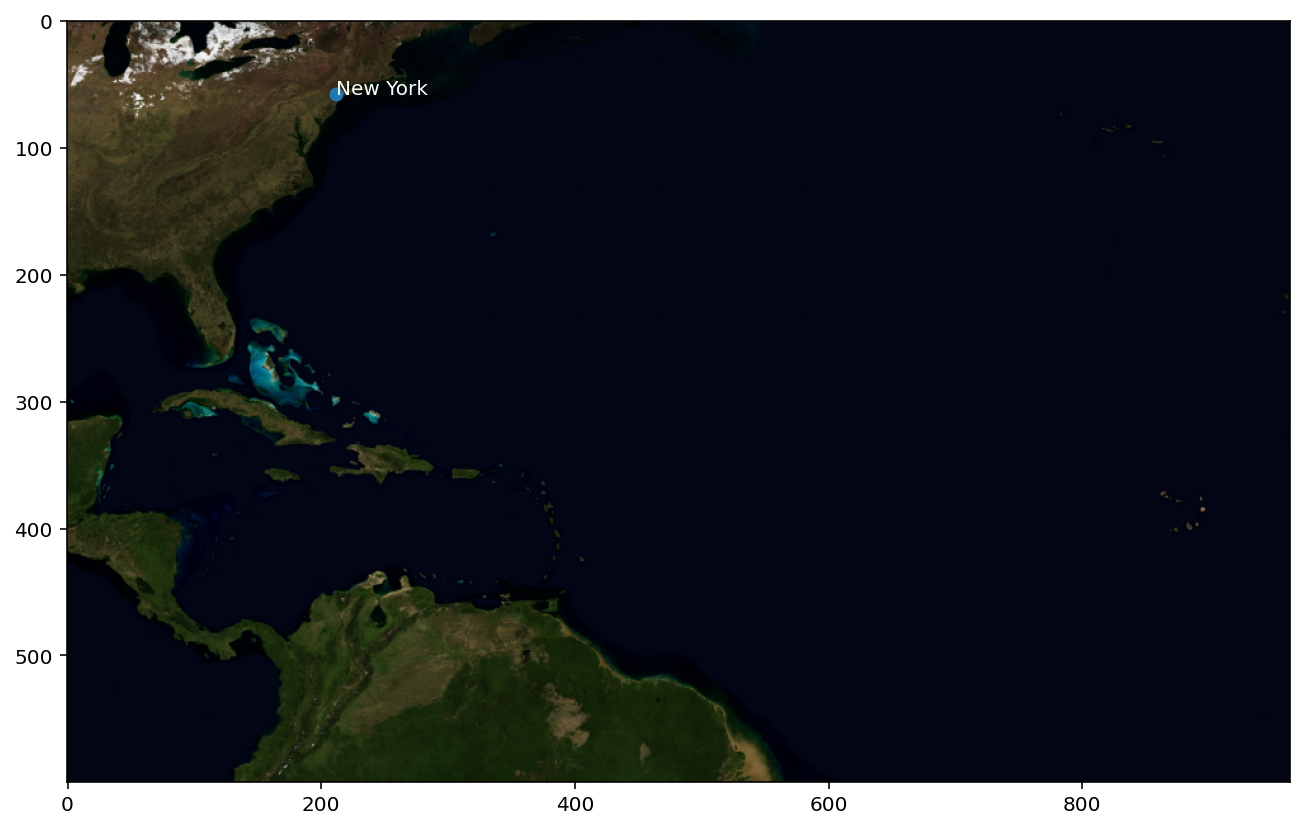

In [4]:
plt.imshow(img)
plt.scatter(x_NY, y_NY)
plt.text(x_NY, y_NY, "New York", color="white")

Step 5: Importing CSV

In [5]:
import csv # load the code library for reading CSV files

x = []
y = []

# Open the data file
with open("irma.csv") as f:
    reader = csv.reader(f)
    # skip the first line of the file
    next(reader)
    for row in reader:
        latitude = float(row[2])
        longitude = float(row[3])

        # translate to pixel coordinates
        x.append((longitude - left)*width/(right-left))
        y.append(height*(1 - (latitude - bottom)/(top-bottom)))

print("x-coords:", x)
print("y-coords:", y)

x-coords: [789.0156292843434, 777.1209213051824, 763.9045791061146, 754.6531395667672, 742.7584315876063, 729.5420893885386, 718.9690156292844, 707.0743076501234, 689.8930627913354, 672.7118179325473, 654.2089388538525, 637.0276939950645, 617.2031806964629, 600.0219358376748, 578.8757883191664, 561.6945434603784, 549.7998354812174, 531.2969564025227, 524.6887853029888, 515.4373457636414, 508.8291746641075, 498.2561009048534, 494.291198245133, 485.03975870578563, 478.43158760625175, 470.50178228681114, 462.57197696737046, 454.6421716479298, 444.0690978886757, 436.139292569235, 426.88785302988754, 426.88785302988754, 417.6364134905402, 408.38497395119276, 399.1335344118454, 389.88209487249793, 389.88209487249793, 381.9522895530573, 372.70085001370995, 362.1277762544557, 352.8763367151084, 343.6248971757609, 340.9816287359473, 337.01672607622703, 334.37345763641343, 331.7301891965999, 329.08692075678647, 325.122018097066, 322.47874965725265, 319.83548121743905, 315.8705785577188, 313.2273

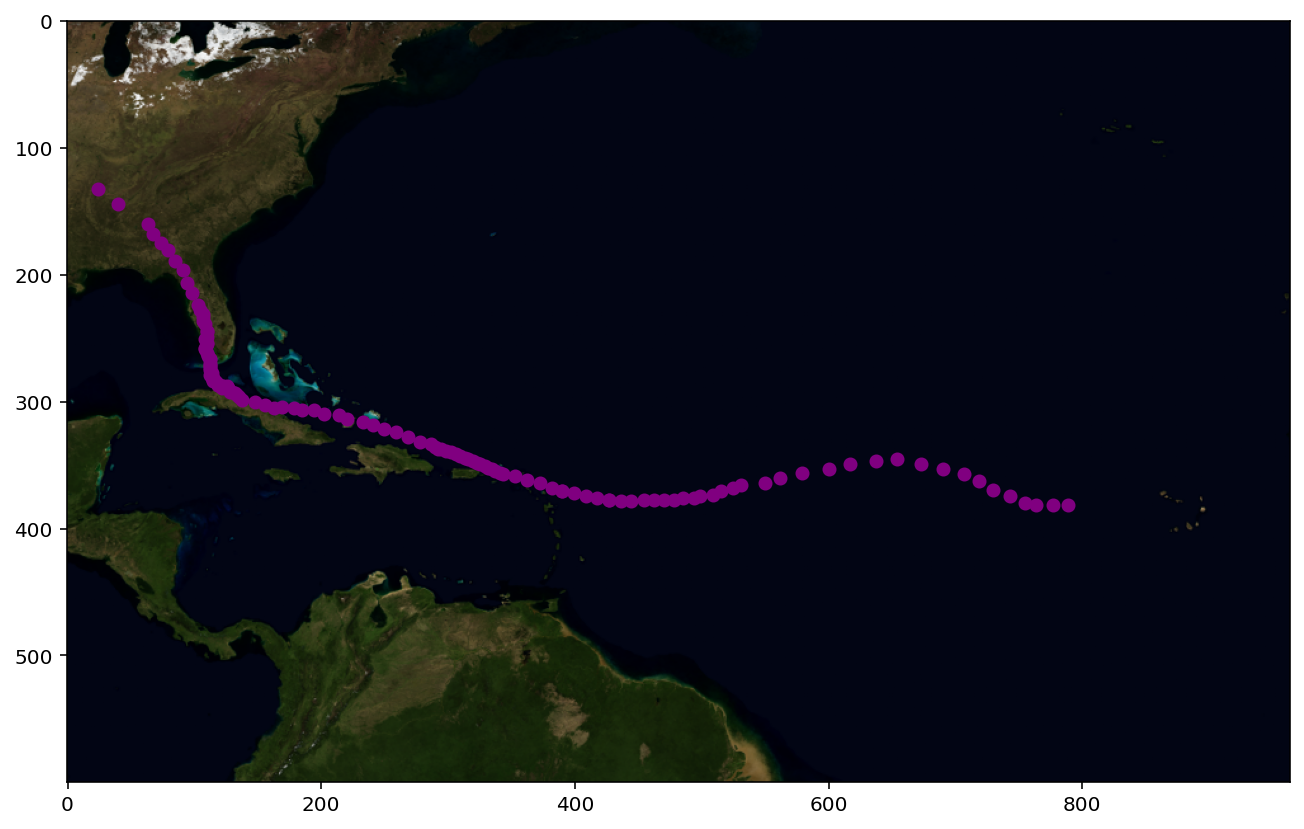

In [6]:
plt.imshow(img)
plt.scatter(x, y, color='purple')

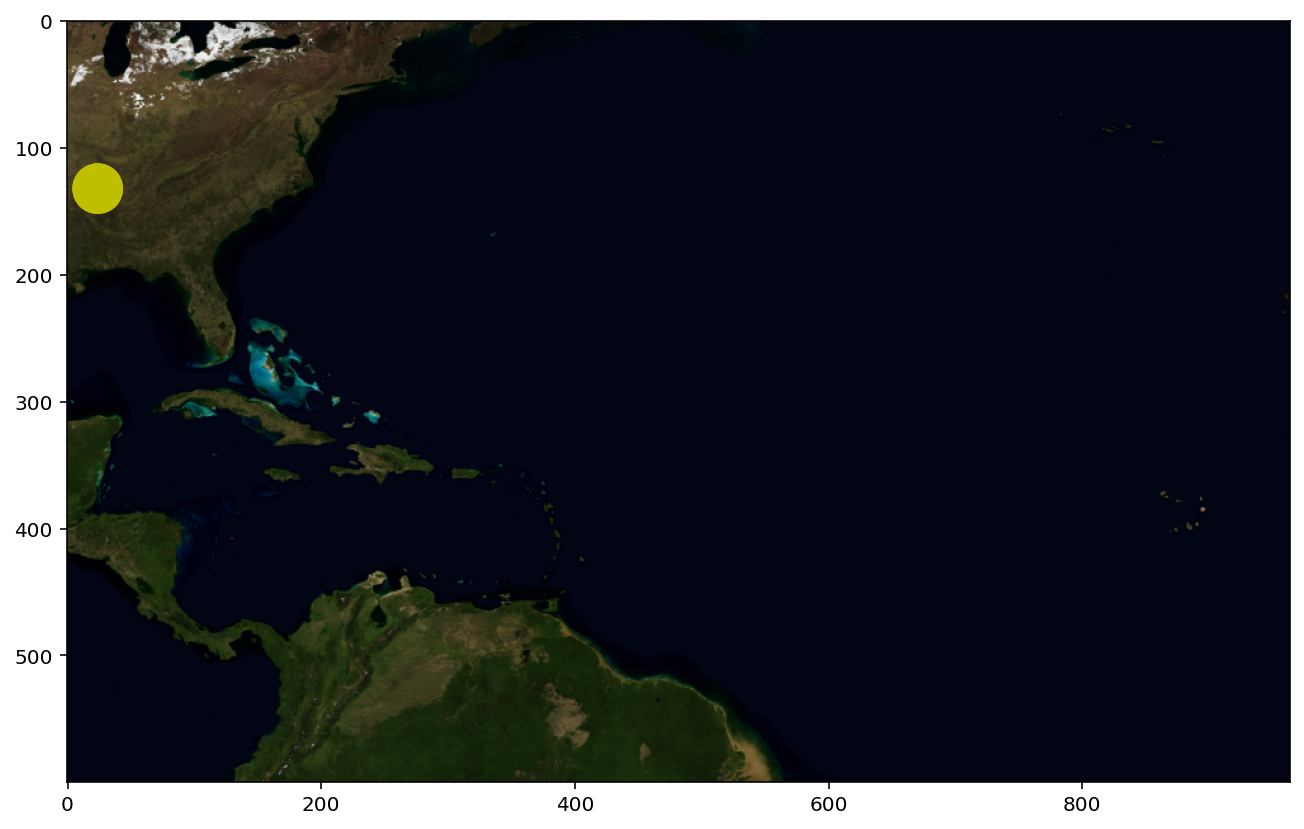

In [7]:
#Animation!!
import matplotlib.animation as animation

fig = plt.figure()
ax = plt.axes()
patch = plt.Circle((0, 0), 20, fc='y')


def init():
    patch.center = (20, 20)
    ax.add_patch(patch)
    return patch,

def animate(i):
    patch.center = (x[i], y[i])
    return patch,

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=len(x), 
                               interval=20,
                               blit=True)

plt.imshow(img,zorder=0)
anim.save('hurricane_irma.mp4', writer = 'ffmpeg', fps=30)